<a href="https://colab.research.google.com/github/RennanRnz/RennanRnz/blob/main/MOD12TAR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão 01 - tarefa 02 - transformações em X e Y

In [ ]:
# Carregamento dos pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
# Carregamento da base.
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

# Descrição das variaveis:

```total_bill```	- valor total da conta paga pelo cliente //

```tip```	- valor da gorjeta que o cliente pagou //

```sex```	- gênero do garçom (garçonete) que atendeu o cliente e recebeu a gorjeta //

```smoker```	- informa se o cliente estava na área de fumantes //

```day```	- dia da semana em que a refeição foi realizada //

```time``` - tipo de refeição (almoço, janta, etc) //

In [ ]:
# Criação das variáveis 'tip_pct' e 'net_bill'.
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']

In [ ]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'net_bill',
       'tip_pct'],
      dtype='object')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


In [ ]:
# Ajustando o modelo.
modelo = smf.ols(formula='tip_pct ~ net_bill', data=tips).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.52e-06
Time:                        16:14:27   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

C:\Users\renna\AppData\Local\Temp\ipykernel_20416\3708885204.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


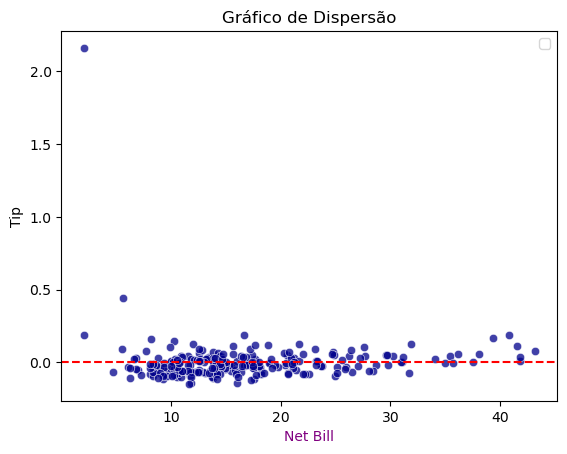

In [ ]:
# Criando o gráfico de dispersão
tips['res'] = modelo.resid
sns.scatterplot(x='net_bill', y='res', data=tips, alpha=.75, color = 'darkblue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Net Bill', color = 'purple')
plt.ylabel('Tip')
plt.title('Gráfico de Dispersão')
plt.legend()
plt.show()

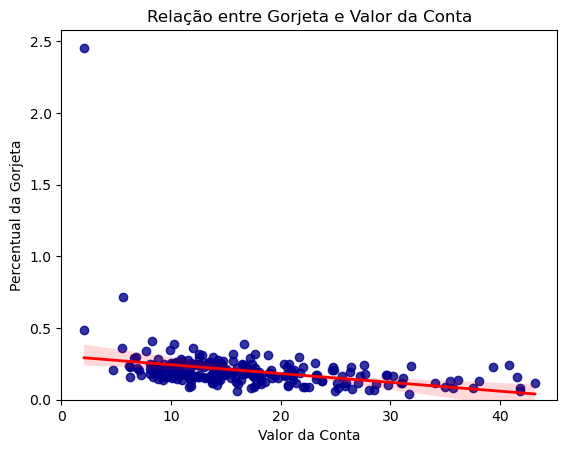

In [ ]:
# Criando o gráfico.
sns.regplot(y='tip_pct', x='net_bill', data=tips,
            scatter_kws={'color': 'darkblue'},
            line_kws={'color': 'red', 'linewidth': 2})

# Adicionando título e rótulos.
plt.title("Relação entre Gorjeta e Valor da Conta")
plt.xlabel("Valor da Conta")
plt.ylabel("Percentual da Gorjeta")

# Definindo os limites dos eixos.
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [ ]:
# Ajustando o modelo.
tips['log_net_bill'] = np.log(tips['net_bill'])
model_log = smf.ols(formula='tip_pct ~ log_net_bill', data=tips)
results_log = model_log.fit()

print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.62e-13
Time:                        16:14:28   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6181      0.054     11.444   

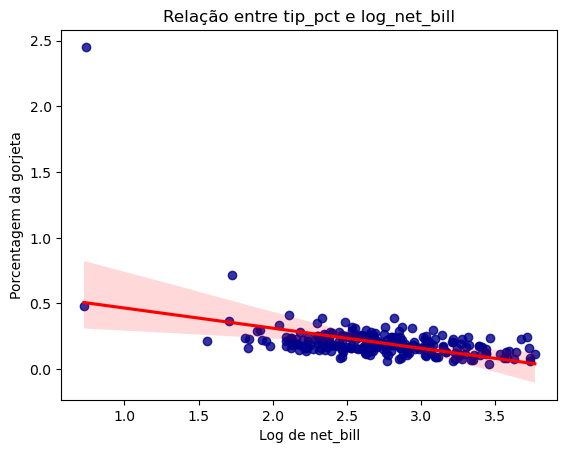

In [ ]:
# Criando o gráfico.
sns.regplot(x='log_net_bill', y='tip_pct', data=tips, line_kws={'color': 'red'}, scatter_kws={'color': 'darkblue'})
plt.title('Relação entre tip_pct e log_net_bill')
plt.xlabel('Log de net_bill')
plt.ylabel('Porcentagem da gorjeta')
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [ ]:
# Criando as variáveis para o polinômio de segundo grau.
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustando o modelo.
modelo3 = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data=tips).fit()

print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.06e-09
Time:                        16:14:28   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

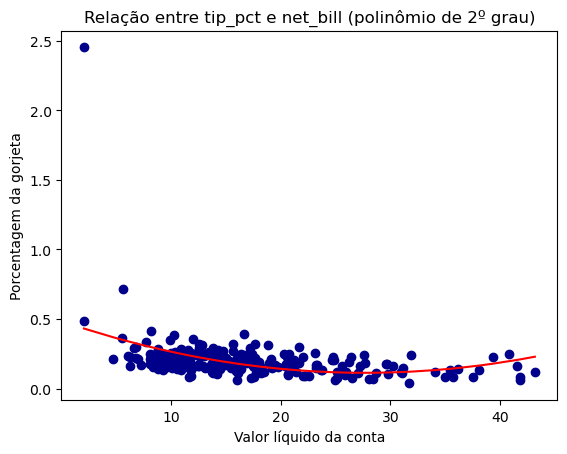

In [ ]:
# Criando uma nova coluna para os valores.
tips['predicted'] = modelo3.predict()

# Ordenando os valores para a plotagem.
sorted_tips = tips.sort_values(by='net_bill')

# Criando o gráfico.
plt.scatter(sorted_tips['net_bill'], sorted_tips['tip_pct'], color='darkblue')
plt.plot(sorted_tips['net_bill'], sorted_tips['predicted'], color='red')
plt.title('Relação entre tip_pct e net_bill (polinômio de 2º grau)')
plt.xlabel('Valor líquido da conta')
plt.ylabel('Porcentagem da gorjeta')
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [ ]:
# Ajustando o modelo com o log de tip_pct
tips['log_tip_pct'] = np.log(tips['tip_pct'])
model_log_tip_pct = smf.ols(formula='log_tip_pct ~ net_bill', data=tips)
results_log_tip_pct = model_log_tip_pct.fit()
print(results_log_tip_pct.summary())

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           8.27e-16
Time:                        16:14:28   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

In [ ]:
# Calculando o R² em tip_pct.
predicted_tip_pct = np.exp(results_log_tip_pct.predict())
r2 = r2_score(tips['tip_pct'], predicted_tip_pct)
print(f"O valor de R² em tip_pct é {r2}")

O valor de R² em tip_pct é 0.08676609740629249


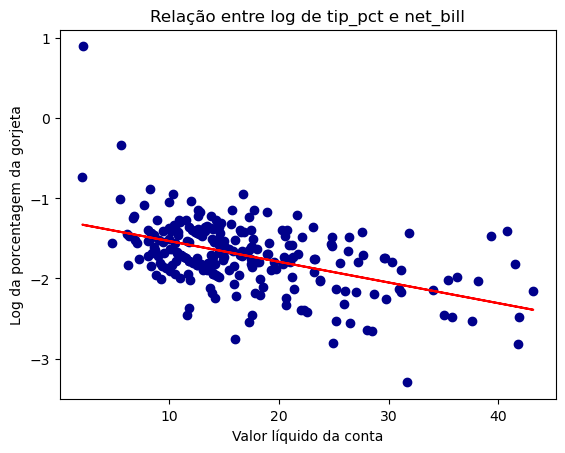

In [ ]:
# Criando o gráfico.
plt.scatter(tips['net_bill'], tips['log_tip_pct'], color='darkblue')
plt.plot(tips['net_bill'], results_log_tip_pct.predict(), color='red')
plt.title('Relação entre log de tip_pct e net_bill')
plt.xlabel('Valor líquido da conta')
plt.ylabel('Log da porcentagem da gorjeta')
plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [ ]:
# Ajustando o modelo com o log de tip_pct e net_bill.
model_log_both = smf.ols(formula='log_tip_pct ~ log_net_bill', data=tips)
results_log_both = model_log_both.fit()
print(results_log_both.summary())

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           5.20e-20
Time:                        16:14:28   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961   

In [ ]:
# Calculando o R² em tip_pct.
predicted_tip_pct = np.exp(results_log_both.predict())
r2 = r2_score(tips['tip_pct'], predicted_tip_pct)
print(f"O R² em tip_pct é {r2}")

O R² em tip_pct é 0.2276852951813606


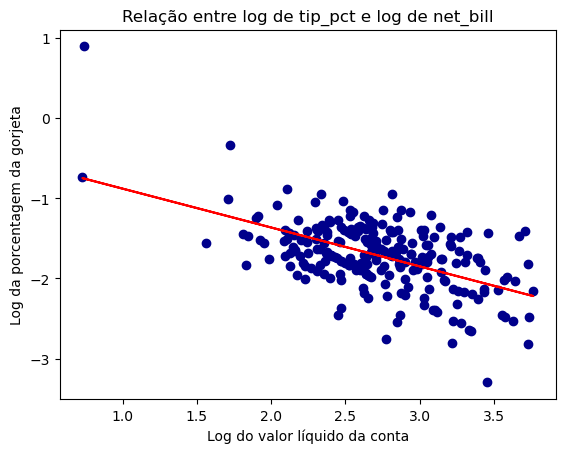

In [ ]:
# Criando o gráfico.
plt.scatter(tips['log_net_bill'], tips['log_tip_pct'], color='darkblue')
plt.plot(tips['log_net_bill'], results_log_both.predict(), color='red')
plt.title('Relação entre log de tip_pct e log de net_bill')
plt.xlabel('Log do valor líquido da conta')
plt.ylabel('Log da porcentagem da gorjeta')
plt.show()

###  6. qual modelo resultou no melhor ajuste?

In [ ]:
# Modelo 1: tip_pct ~ net_bill.
tips['pred1'] = modelo.fittedvalues
corr1 = tips[['pred1', 'tip_pct']].corr().iloc[0,1]

# Modelo 2: tip_pct ~ log_net_bill.
tips['pred2'] = results_log.fittedvalues
corr2 = tips[['pred2', 'tip_pct']].corr().iloc[0,1]

# Modelo 3: tip_pct ~ net_bill + net_bill_squared.
tips['pred3'] = modelo3.fittedvalues
corr3 = tips[['pred3', 'tip_pct']].corr().iloc[0,1]

# Modelo 4: log_tip_pct ~ net_bill.
tips['pred4'] = np.exp(results_log_tip_pct.fittedvalues)
corr4 = tips[['pred4', 'tip_pct']].corr().iloc[0,1]

# Modelo 5: log_tip_pct ~ log_net_bill.
tips['pred5'] = np.exp(results_log_both.fittedvalues)
corr5 = tips[['pred5', 'tip_pct']].corr().iloc[0,1]

print(f"Correlação do Modelo 1: {corr1}")
print(f"Correlação do Modelo 2: {corr2}")
print(f"Correlação do Modelo 3: {corr3}")
print(f"Correlação do Modelo 4: {corr4}")
print(f"Correlação do Modelo 5: {corr5}")

Correlação do Modelo 1: 0.3021437558623868
Correlação do Modelo 2: 0.44914234088544236
Correlação do Modelo 3: 0.3969985482882293
Correlação do Modelo 4: 0.33824530436548234
Correlação do Modelo 5: 0.5558315818692049


## O melhor ajuste resultou da correlação do modelo 5 porem cabe mencionar aqui que nenhum destes modelos são efetivamente bons, tendo em vista a distancia destas correlações ao  referencial 1 da relação linear.

----------------------------------